In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import json
with open('kaggle (2).json', "r") as file:
    data = json.load(file)

In [3]:
data

{'username': 'aabithmusthaq', 'key': '36a38aa4324303944ad3594de82cc4c5'}

In [4]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [6]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [7]:
api.dataset_download_files('dineshpiyasamara/sentiment-analysis-dataset')

Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset


In [8]:
df = pd.read_csv(r"C:\Users\aabidh musthaq\Desktop\MAchine lea projects\Classification model\Sentimental-analysis\sentiment_analysis.csv")

In [9]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


Data preprocessing and text preprocesssing

In [10]:
df.shape

(7920, 3)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [13]:
import re
import nltk
import string
from nltk.corpus import stopwords #important content
from nltk.stem.porter import PorterStemmer #take rootword
from sklearn.feature_extraction.text import TfidfVectorizer #convert text to feature vectors
from spellchecker import SpellChecker

Preprocessing 

In [14]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [15]:
df.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(tweet): #function to take root word of each word in the content and return the content
    stemmed_tweet = re.sub('[^a-zA-Z]', ' ', tweet) #remove all characters except a-z and A-Z words vitahrai symbol eva ain krnna symbol eva tynva eva space venva "" content kynne doc eke combine krnna
    stemmed_tweet = re.sub(r'http\S+', '', stemmed_tweet) #remove urls
    stemmed_tweet = stemmed_tweet.lower() #convert all characters to lower case
    stemmed_tweet = stemmed_tweet.split() #split the content into words list valata
    stemmed_tweet = [port_stem.stem(word) for word in stemmed_tweet if not word in stopwords.words('english')] #take root word of each word main word ganne stopwords eka ain krnva 
    stemmed_tweet= ' '.join(stemmed_tweet) #join the words to form a sentence
    stemmed_tweet = re.sub(r'\s\s+', ' ', stemmed_tweet) #remove extra spaces
    stemmed_tweet = re.sub(r'\d+', '', stemmed_tweet) #remove digits
    stemmed_tweet = re.sub(r'[^\w\s]', '', stemmed_tweet) #remove punctuation
    stemmed_tweet = re.sub(r'b\s+', '', stemmed_tweet) #remove single characters
    
    return stemmed_tweet

In [18]:
df['tweet'] = df['tweet'].apply(stemming)

In [19]:
df.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test goo gl h mfqv androi...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri h...
4,5,1,amaz servic appl even talk question unless pay...


In [20]:
df.tail()

,id,label,tweet
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...
7919,7920,0,appl barcelona appl store bcn barcelona travel...


In [21]:
df.tail()

,id,label,tweet
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...
7919,7920,0,appl barcelona appl store bcn barcelona travel...


In [22]:
df.shape

(7920, 3)

In [23]:
def remove_single(tweet):
    # Define a pattern to match single or two-character words
    pattern = r'\b\w{1,2}\b'  # \b indicates word boundaries, \w{1,2} matches one or two word characters
    
    # Use re.sub() to replace matched patterns with an empty string
    cleaned_tweet = re.sub(pattern, '', tweet)
    
    return cleaned_tweet

In [24]:
df['tweet'] = df['tweet'].apply(remove_single)

Building vocablary 

In [25]:
from collections import Counter
cnt = Counter()

In [26]:
df['tweet']

0       fingerprint pregnanc test goo   mfqv android a...
1       final transpar silicon case thank uncl yay son...
2       love would  talk makememori unplug relax iphon...
3       wire know georg made way iphon cute daventri h...
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [27]:
for sentence in df['tweet']:
    cnt.update(sentence.split())

In [28]:
cnt

Counter({'fingerprint': 6,
         'pregnanc': 1,
         'test': 13,
         'goo': 125,
         'mfqv': 1,
         'android': 404,
         'app': 509,
         'beauti': 330,
         'cute': 337,
         'health': 122,
         'iger': 149,
         'iphoneonli': 131,
         'iphonesia': 139,
         'iphon': 4343,
         'final': 199,
         'transpar': 5,
         'silicon': 8,
         'case': 408,
         'thank': 267,
         'uncl': 4,
         'yay': 68,
         'soni': 851,
         'xperia': 60,
         'sonyexperia': 2,
         'http': 3406,
         'instagram': 2192,
         'com': 3367,
         'yget': 1,
         'love': 530,
         'would': 152,
         'talk': 29,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 142,
         'wifi': 48,
         'connect': 27,
         'lsupcu': 1,
         'wire': 10,
         'know': 114,
         'georg': 2,
         'made': 73,
         'way': 57,
         'daven

In [29]:
len(cnt)

19837

In [30]:
df.shape #features adu venna one data record ganata vada

(7920, 3)

In [31]:
tokens = [key for key, value in cnt.items() if value > 25] #take words which have more than 20 occurance

In [32]:
len(tokens)

541

In [33]:
def save_vocablary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
    
save_vocablary(tokens, 'vocab.txt')

test/train data

In [34]:
df

,id,label,tweet
0,1,0,fingerprint pregnanc test goo mfqv android a...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would talk makememori unplug relax iphon...
3,4,0,wire know georg made way iphon cute daventri h...
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [35]:
x = df['tweet']
y = df['label']

In [36]:
x.head()

0    fingerprint pregnanc test goo   mfqv android a...
1    final transpar silicon case thank uncl yay son...
2    love would  talk makememori unplug relax iphon...
3    wire know georg made way iphon cute daventri h...
4    amaz servic appl even talk question unless pay...
Name: tweet, dtype: object

In [37]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.shape

(6336,)

In [41]:
x_test.shape

(1584,)

Vectorization

In [42]:
def vectorizer(ds, vocab ): #convert text to feature vectors
    vectorizer_list = [] #create an empty list to store the feature vectors
    
    for sentence in ds: #iterate through each sentence in the dataset
        sentence_list = np.zeros(len(vocab)) #create a list of zeros with the length of the vocab
        
        for i in range(len(vocab)):
            if vocab[i] in sentence.split():
                sentence_list[i] = 1 #if the word in the vocab is in the sentence, assign 1 to the corresponding index in the sentence list
        
        vectorizer_list.append(sentence_list) #append the sentence list to the vectorizer list
    
    vectorizer_list_new = np.array(vectorizer_list, dtype= np.float32) #convert the vectorizer list to a numpy array
    
    return vectorizer_list_new

In [43]:
vectorizer_x_train =vectorizer(x_train, tokens) #convert the training dataset to feature vectors

In [44]:
for i in vectorizer_x_train[0]: #print the first feature vector
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [45]:
vectorizer_x_test =vectorizer(x_test, tokens)

In [46]:
y_train.value_counts() #imbalanced dataset 

0    4742
1    1594
Name: label, dtype: int64

### Handle imbalance

In [47]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() #create an instance of the SMOTE class with random state 42 
vectorizer_x_train_smote, y_train_smote = smote.fit_resample(vectorizer_x_train, y_train)  #apply the SMOTE to the training dataset
print(vectorizer_x_train_smote.shape, y_train_smote.shape) #print the shape of the resampled dataset

(9484, 541) (9484,)


In [50]:
y_train_smote.value_counts() #balanced dataset

0    4742
1    4742
Name: label, dtype: int64

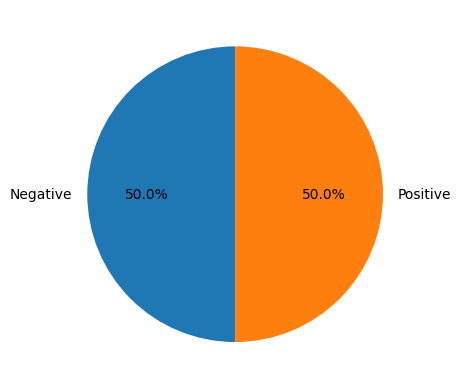

In [51]:
plt.pie(y_train_smote.value_counts(), labels = ['Negative', 'Positive'], autopct='%1.1f%%', startangle=90) #plot the pie chart
plt.show()

In [52]:
vectorizer_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9479    1
9480    1
9481    1
9482    1
9483    1
Name: label, Length: 9484, dtype: int64

In [54]:
vectorizer_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_test

4896    0
7539    1
1677    0
1964    0
3025    0
       ..
1419    0
3939    0
7834    1
5137    1
4434    0
Name: label, Length: 1584, dtype: int64

### model training and evaluation 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

def training_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    class_rep = classification_report(y_act, y_pred)
    conf_mat = confusion_matrix(y_act, y_pred)
    return acc, f1, pre, rec, class_rep, conf_mat

def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    class_rep = classification_report(y_act, y_pred)
    conf_mat = confusion_matrix(y_act, y_pred)
    return acc, f1, pre, rec, class_rep, conf_mat

Logistic regression

In [58]:
lr = LogisticRegression( C=0.1, fit_intercept=True, solver='liblinear', max_iter=1000)
lr.fit(vectorizer_x_train_smote, y_train_smote)
y_train_pred = lr.predict(vectorizer_x_train_smote)
training_score(y_train_smote, y_train_pred)

(0.904,
 0.907,
 0.88,
 0.935,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.87      0.90      4742\n           1       0.88      0.94      0.91      4742\n\n    accuracy                           0.90      9484\n   macro avg       0.91      0.90      0.90      9484\nweighted avg       0.91      0.90      0.90      9484\n',
 array([[4138,  604],
        [ 308, 4434]], dtype=int64))

In [59]:
y_test_pred = lr.predict(vectorizer_x_test)
validation_score(y_test, y_test_pred)

(0.888,
 0.816,
 0.737,
 0.914,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.88      0.92      1152\n           1       0.74      0.91      0.82       432\n\n    accuracy                           0.89      1584\n   macro avg       0.85      0.90      0.87      1584\nweighted avg       0.90      0.89      0.89      1584\n',
 array([[1011,  141],
        [  37,  395]], dtype=int64))

### Multinomial naive bayes

In [60]:
Mnb = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=None)
Mnb.fit(vectorizer_x_train_smote, y_train_smote)
y_train_pred = Mnb.predict(vectorizer_x_train_smote)
training_score(y_train_smote, y_train_pred)

(0.89,
 0.892,
 0.876,
 0.908,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.87      0.89      4742\n           1       0.88      0.91      0.89      4742\n\n    accuracy                           0.89      9484\n   macro avg       0.89      0.89      0.89      9484\nweighted avg       0.89      0.89      0.89      9484\n',
 array([[4131,  611],
        [ 436, 4306]], dtype=int64))

In [61]:
y_test_pred = Mnb.predict(vectorizer_x_test)
validation_score(y_test, y_test_pred)

(0.886,
 0.812,
 0.74,
 0.898,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.88      0.92      1152\n           1       0.74      0.90      0.81       432\n\n    accuracy                           0.89      1584\n   macro avg       0.85      0.89      0.87      1584\nweighted avg       0.90      0.89      0.89      1584\n',
 array([[1016,  136],
        [  44,  388]], dtype=int64))

### Decsison tree

In [62]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1)
dt.fit(vectorizer_x_train_smote, y_train_smote)
y_train_pred = dt.predict(vectorizer_x_train_smote)
training_score(y_train_smote, y_train_pred)

(0.919,
 0.923,
 0.883,
 0.967,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.87      0.92      4742\n           1       0.88      0.97      0.92      4742\n\n    accuracy                           0.92      9484\n   macro avg       0.92      0.92      0.92      9484\nweighted avg       0.92      0.92      0.92      9484\n',
 array([[4133,  609],
        [ 155, 4587]], dtype=int64))

In [63]:
y_test_pred = dt.predict(vectorizer_x_test)
validation_score(y_test, y_test_pred)

(0.867,
 0.787,
 0.698,
 0.9,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.85      0.90      1152\n           1       0.70      0.90      0.79       432\n\n    accuracy                           0.87      1584\n   macro avg       0.83      0.88      0.84      1584\nweighted avg       0.89      0.87      0.87      1584\n',
 array([[984, 168],
        [ 43, 389]], dtype=int64))

### Random Forrest

In [64]:
Rf = RandomForestClassifier(n_estimators=100, max_depth=10)

Rf.fit(vectorizer_x_train_smote, y_train_smote)

y_train_pred = Rf.predict(vectorizer_x_train_smote)

training_score(y_train_smote, y_train_pred)

(0.904,
 0.909,
 0.866,
 0.956,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.85      0.90      4742\n           1       0.87      0.96      0.91      4742\n\n    accuracy                           0.90      9484\n   macro avg       0.91      0.90      0.90      9484\nweighted avg       0.91      0.90      0.90      9484\n',
 array([[4041,  701],
        [ 210, 4532]], dtype=int64))

In [65]:
y_test_pred = Rf.predict(vectorizer_x_test)
validation_score(y_test, y_test_pred)

(0.874,
 0.798,
 0.711,
 0.91,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.86      0.91      1152\n           1       0.71      0.91      0.80       432\n\n    accuracy                           0.87      1584\n   macro avg       0.84      0.89      0.85      1584\nweighted avg       0.89      0.87      0.88      1584\n',
 array([[992, 160],
        [ 39, 393]], dtype=int64))

In [66]:
SV = SVC()

SV.fit(vectorizer_x_train_smote, y_train_smote)

y_train_pred = SV.predict(vectorizer_x_train_smote)

training_score(y_train_smote, y_train_pred)

(0.964,
 0.965,
 0.939,
 0.994,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.94      0.96      4742\n           1       0.94      0.99      0.97      4742\n\n    accuracy                           0.96      9484\n   macro avg       0.97      0.96      0.96      9484\nweighted avg       0.97      0.96      0.96      9484\n',
 array([[4434,  308],
        [  29, 4713]], dtype=int64))

In [67]:
y_test_pred = SV.predict(vectorizer_x_test)
validation_score(y_test, y_test_pred)

(0.883,
 0.801,
 0.747,
 0.863,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.89      0.92      1152\n           1       0.75      0.86      0.80       432\n\n    accuracy                           0.88      1584\n   macro avg       0.85      0.88      0.86      1584\nweighted avg       0.89      0.88      0.89      1584\n',
 array([[1026,  126],
        [  59,  373]], dtype=int64))

In [68]:
import pickle

with open('sentiment_analysis.pkl', 'wb') as file:
    pickle.dump(Mnb, file)